<a href="https://colab.research.google.com/github/SilenMe/improving-malicious-url-detector-research-paper/blob/main/assignment_1_17260.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

note: you will need capture.jpg and urldata.csv to run this notebook. Hover to https://github.com/SilenMe/improving-malicious-url-detector-research-paper for files and a copy of this repository

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
urldata = pd.read_csv("urldata.csv")

Text(0, 0.5, 'Number Of URLs')

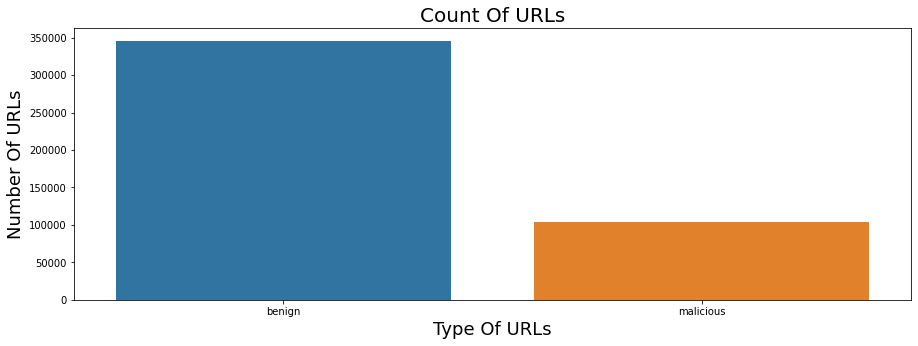

In [3]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

since 'benign' sites are more so it will affect the accuracy so decreasing the no. of benign urls

In [4]:
urldata.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [5]:
benignDF = urldata[urldata['result'] == 0]
benignDF.shape

(345738, 4)

In [6]:
maliciousDF = urldata[urldata['result'] == 1]
maliciousDF.shape

(104438, 4)

In [7]:
benignDF=benignDF[:104438]
benignDF.shape

(104438, 4)

now both are same in number so the result wouldn't be baised

In [8]:
f=[benignDF,maliciousDF]
result = pd.concat(f)
result.head(20)

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0
5,5,https://www.reddit.com,benign,0
6,6,https://www.yahoo.com,benign,0
7,7,https://www.google.co.in,benign,0
8,8,https://www.qq.com,benign,0
9,9,https://www.amazon.com,benign,0


Text(0, 0.5, 'Number Of URLs')

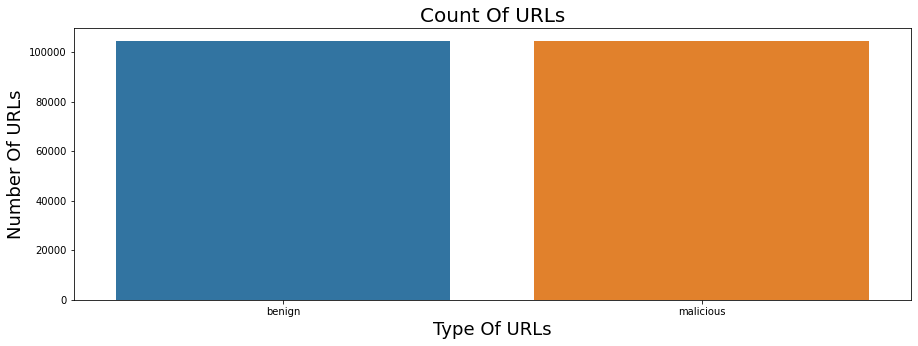

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=result)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

### we got the balenced data and the data size is also significant

In [10]:
urldata=result
urldata = urldata.drop('Unnamed: 0',axis=1)
urldata.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [11]:
urldata.shape

(208876, 3)

In [12]:
urldata.info() #label:  malicious or benign

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208876 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     208876 non-null  object
 1   label   208876 non-null  object
 2   result  208876 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 16.4+ MB


# feature extraction
ref: https://www.sciencedirect.com/science/article/pii/S0306437920300053  
ref: https://www.ibm.com/docs/SSGMCP_5.1.0/com.ibm.cics.ts.internet.doc/topics/dfhtl_uricomp.html

we need features that saperates the good and malicious URL. The best methode is extract from Keywords in a URL. It contain important information that can be used to judge whether a URL is malicious. The selected keywords include: alipay, jd, safety, paypal, google, apple, facebook, amazon, porn, gamble, and awarding. Such keywords are frequently used to counterfeit famous websites and deceive the users.  
We are selecting thsse features from URL:  
1. domain_length: The length of the domain url.
2. if_com :	If the top level domain name is “.com”  
3. pure_domain_length: The length of the pure domain or say 'Length of Hostname'  
4. Length Of Top Level Domain  
5. Length Of Path  
6. Use of IP or not  
7. Use of Shortening URL or not  
These are the main attributes of an url and Good URL and Malicious URL differs a lot on these attributes.  

Some other attributes as deciding factor is Fount Feature beacuse malicious URL are generally very long, it cantains a lot of redirection to other sites, a number of pop-ups etc. so count feature is also very important:
1. Count Of '-'
2. Count Of '@' : 
3. Count Of '?' : “?” in URL acts as separator
4. Count Of '%' : normally used for encoding
5. Count Of '.' : a url component saparator
6. Count Of '=' : 
7. Count Of 'http' : malicious URL are usually uses 'http' protocol rather than 'https' 
8. Count Of 'www'
9. Count Of Digits
10. Count Of Letters
11. Count Of Number Of Directories : '/' is used for directory hierarchy




In [13]:
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))
urldata.head()

,url,label,result,url_length
0,https://www.google.com,benign,0,22
1,https://www.youtube.com,benign,0,23
2,https://www.facebook.com,benign,0,24
3,https://www.baidu.com,benign,0,21
4,https://www.wikipedia.org,benign,0,25


### importing some packages for working with url:
1. tld · PyPI: Extract the top level domain (TLD) from the URL given. ref: https://pypi.org/project/tld/  
2. urllib.parse : This module provides a standard interface to break Uniform Resource Locator (URL) strings in components or to combine the components back into a URL string. It also has functions to convert a "relative URL" to an absolute URL given a "base URL." 
ref: https://docs.python.org/3/library/urllib.parse.html 

In [14]:
!pip3 install tld

In [15]:
from urllib.parse import urlparse
from tld import get_tld
import os.path

In [16]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))
#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,https://www.google.com,benign,0,22,14,0,0,com,3
1,https://www.youtube.com,benign,0,23,15,0,0,com,3
2,https://www.facebook.com,benign,0,24,16,0,0,com,3
3,https://www.baidu.com,benign,0,21,13,0,0,com,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3


we are using len(tld) because working with numbers is far better option is ML

In [17]:
urldata = urldata.drop("tld",1)# dropping because we have to work with len(tld) and we have got len(tld) with tld
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length
0,https://www.google.com,benign,0,22,14,0,0,3
1,https://www.youtube.com,benign,0,23,15,0,0,3
2,https://www.facebook.com,benign,0,24,16,0,0,3
3,https://www.baidu.com,benign,0,21,13,0,0,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,3


In [18]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,0,0,2,0,1,1,1,0,20,0


### heat map tells us correlation: if two colums are higly correlated(value close to 1 or -1) to each-other then we can drop one of them

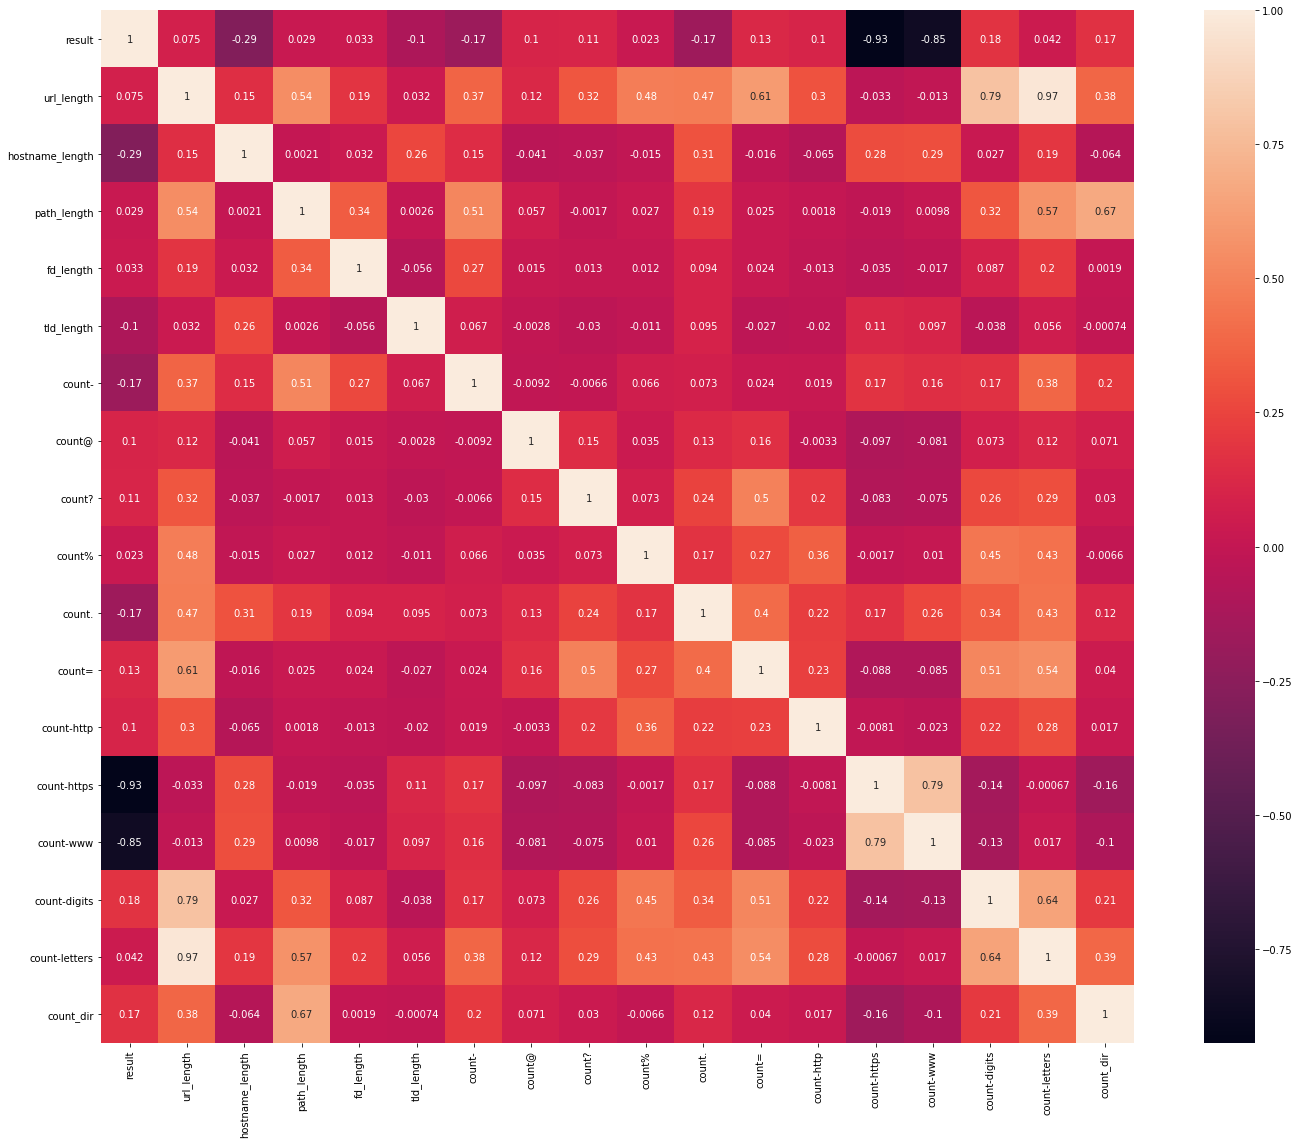

In [19]:
corr = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corr, square=True, annot = True, annot_kws={'size':10})

no critical correlation except in columns 'countHttp' and 'countWWW' but we know that both play important role in url so we are not removing any of them

Text(0, 0.5, 'Number Of URLs')

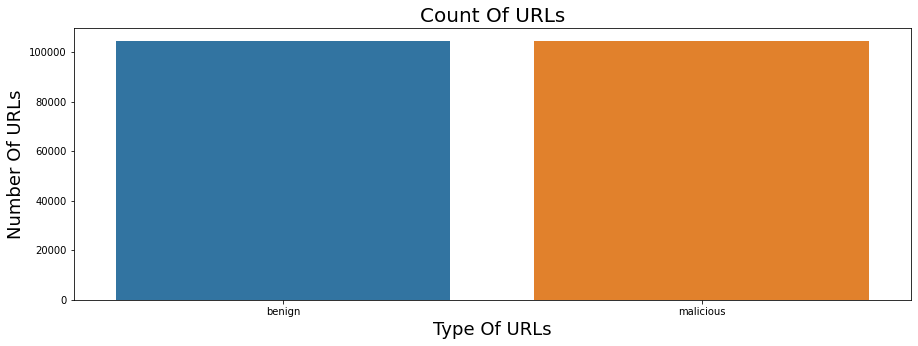

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

## everything looks fine, now we are suffling the dataset because to escape from unnecessary overfitting

In [21]:
from sklearn.utils import shuffle
urldata = shuffle(urldata)
urldata.head(20)

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
40412,https://www.en.wikipedia.org/wiki/U.S._Route_4...,benign,0,63,20,35,4,3,0,0,0,0,5,0,1,1,1,2,47,2
414382,http://spinmeayarn.com/mjkiq,malicious,1,28,15,6,5,3,0,0,0,0,1,0,1,0,0,0,23,1
51557,https://www.genforum.genealogy.com/hoffmann/,benign,0,44,26,10,8,3,0,0,0,0,3,0,1,1,1,0,36,2
96756,https://www.secfb.neswblogs.com/2007/11/27/200...,benign,0,98,23,67,4,3,7,0,0,0,3,0,1,1,1,12,68,5
16627,https://www.chicago.blockshopper.com/property/...,benign,0,81,28,45,8,3,5,0,0,0,3,0,1,1,1,20,45,4
1326,https://www.camdolls.com,benign,0,24,16,0,0,3,0,0,0,0,2,0,1,1,1,0,19,0
1645,https://www.vmware.com,benign,0,22,14,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0
93623,https://www.revrock.blogspot.com/2010/04/1.html,benign,0,47,24,15,4,12,0,0,0,0,4,0,1,1,1,7,30,3
97594,https://www.shiralazar.com/blog/,benign,0,32,18,6,4,3,0,0,0,0,2,0,1,1,1,0,25,2
21655,https://www.czq0tatv.strategia-tactica.ru/?n=3...,benign,0,64,33,1,0,2,1,0,1,0,3,2,1,1,1,11,40,1


breaking into training and testing datasets 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

## using decision tree

In [24]:
#Predictor Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count@', 'count?',
       'count-http','count-https', 'count-digits']]

#Target Variable
y = urldata['result']
#Splitting the data into Training 75% and Testing 25%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [25]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

dt_predictions = dt_model.predict(x_test)
accuracy_score(y_test,dt_predictions)

0.9809264826978686

accuracy is 0.0.9809264826978686 which is greater the previous accuracy 0.952..

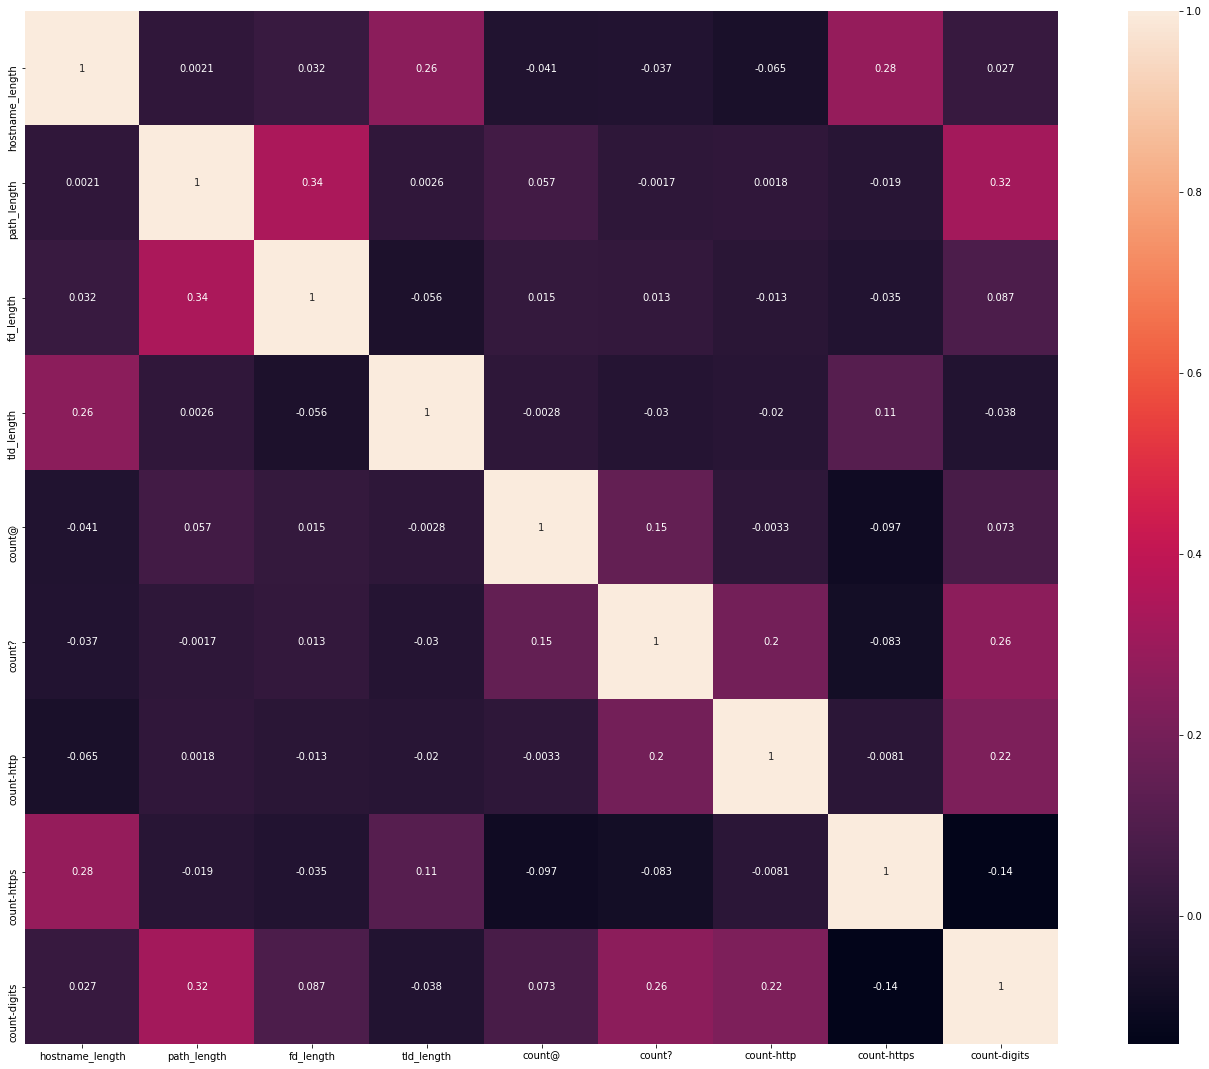

In [26]:
corr = x.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corr, square=True, annot = True, annot_kws={'size':10})

we can see that there is no critical correlation so we avoided the problem of overfitting

#### choose between

count= and count ?  
count. path_length  
path length and count-  
count? count=  
count% vs count digit  
count http and count www  

## using Logistic Regression

In [27]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

log_predictions = log_model.predict(x_test)
accuracy_score(y_test,log_predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9702598670981827

accuracy is 0.9702598670981827 which is greater the previous accuracy 0.945...

## using Random Forest Classifier

In [28]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_predictions = rfc.predict(x_test)
accuracy_score(y_test, rfc_predictions)

0.9851586587257511

accuracy is 0.9851586587257511 which is greater the previous accuracy 0.968..

## using MLPClassifier
we have to find best value of iteration and batch size so that nueral network don't overfit or underfit

In [29]:
#for max iter 50
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
clf = MLPClassifier(random_state=42, max_iter=50,batch_size='auto', ).fit(x_train, y_train)
clf.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9728259828797947

In [30]:
#for max iter 40
clf = MLPClassifier(random_state=42, max_iter=40,batch_size='auto', ).fit(x_train, y_train)
clf.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9765602558455735

In [35]:
for i in range(20,200,40):
  clf = MLPClassifier(random_state=42, max_iter=i ).fit(x_train, y_train)
  print(clf.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.976521955610027


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9764070549033876


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9772496600854095
0.977805013500833
0.977805013500833


In [37]:
#max iter 128 oooks good, now checking for batch size
b=[16,32,64,128,256,512,1024]

for i in b:
  clf = MLPClassifier(random_state=42, max_iter=128,batch_size=i ).fit(x_train, y_train)
  print(clf.score(x_test, y_test))

0.9764453551389342
0.977460311380915
0.9789157203316801


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9780539650318849


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.9759857523123767


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.9752197476014477
0.9745303433616117


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


batch size 64 looks good

In [40]:
# optimized
clf = MLPClassifier(random_state=42, max_iter=128,batch_size=64 ).fit(x_train, y_train)
print(clf.score(x_test, y_test))


0.9789157203316801


getting DATA for Boxplot(IQR graph) for each algorithm 
we can get the chart from running the algorithm many times and get a  list of different values then plot Boxplot

note: don't set a fixed random state for that

In [45]:
#decision tree
dtl=[]
for i in range(1,20):
  dt_model = DecisionTreeClassifier()
  dt_model.fit(x_train,y_train)

  dt_predictions = dt_model.predict(x_test)
  dtl.append(accuracy_score(y_test,dt_predictions))
dtl

[0.9805817805779505,
 0.9805434803424041,
 0.9806966812845899,
 0.9807541316379096,
 0.9806392309312703,
 0.9806392309312703,
 0.9806583810490435,
 0.9806392309312703,
 0.9808115819912292,
 0.9809073325800953,
 0.980792431873456,
 0.9808498822267757,
 0.9805434803424041,
 0.9808498822267757,
 0.9807541316379096,
 0.9808690323445489,
 0.9807349815201364,
 0.9806966812845899,
 0.9807541316379096]

In [46]:

#logistic regression
lrl=[]
for i in range(1,20):
  log_model = LogisticRegression()
  log_model.fit(x_train,y_train)

  log_predictions = log_model.predict(x_test)
  lrl.append(accuracy_score(y_test,log_predictions))
lrl

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827,
 0.9702598670981827]

In [51]:
#random forest


rfl=[]
for i in range(1,8):
  rfc = RandomForestClassifier()
  rfc.fit(x_train, y_train)

  rfc_predictions = rfc.predict(x_test)
  rfl.append(accuracy_score(y_test, rfc_predictions))
rfl

[0.9852352591968441,
 0.9853501599034834,
 0.9852735594323905,
 0.9851969589612977,
 0.9852161090790709,
 0.9853693100212566,
 0.9849863076657921]

In [52]:
# neural network

nnl=[]
for i in range(1,8):
  clf = MLPClassifier(random_state=42, max_iter=128,batch_size=64 ).fit(x_train, y_train)
  nnl.append(clf.score(x_test, y_test))
nnl

[0.9789157203316801,
 0.9789157203316801,
 0.9789157203316801,
 0.9789157203316801,
 0.9789157203316801,
 0.9789157203316801,
 0.9789157203316801]

In [53]:
dtl = pd.DataFrame(dtl)
lrl = pd.DataFrame(lrl)
rfl = pd.DataFrame(rfl)
nnl = pd.DataFrame(nnl)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


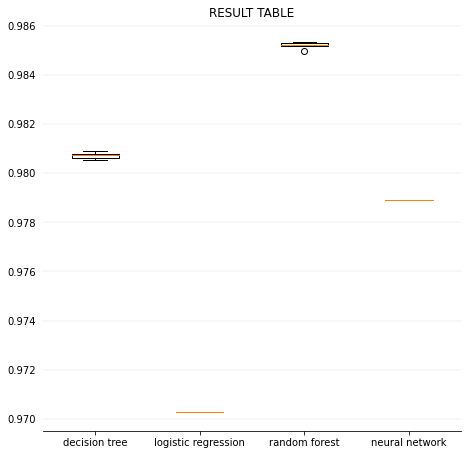

In [59]:



fig, ax = plt.subplots(figsize=(7.5,7.5))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('RESULT TABLE')
# Set species names as labels for the boxplot
dataset = [dtl,lrl,rfl,nnl]
labels = ['decision tree','logistic regression','random forest','neural network']
ax.boxplot(dataset, labels=labels)
plt.show()

# we can see we got th best result in random forest

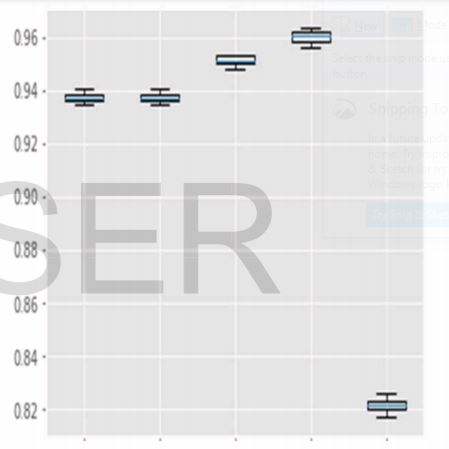

In [56]:
#showing authors boxplot
from IPython.display import Image
Image(filename='Capture.JPG') 